In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [66]:
sns.set(font_scale=1.3)

In [238]:
def map_column(df):
    column_mapping = {
        'error_nq': 'NoiseErr',
        'error_topk': 'TopkErr',
        'error_infci': 'InfluErr',
        'error_rnkci': 'RankErr',
        't_phase_1': 'Phase-1',
        't_phase_2': 'Phase-2',
        't_phase_3': 'Phase-3'
    }
    df = df.rename(columns=column_mapping)
    return df

# Questions

In [246]:
question_ipums = pd.read_csv('../ipumscps/results/questions.csv')
question_german = pd.read_csv('../german/results/questions.csv')
question_df = pd.concat([question_ipums, question_german])
question_df = map_column(question_df)
question_df = question_df.groupby(['data', 'Agb', 'g1', 'g2']).median().reset_index()
question_df = pd.melt(
    question_df,
    id_vars = ['data', 'Agb', 'g1', 'g2'],
    value_vars = ['NoiseErr', 'TopkErr', 'InfluErr', 'RankErr', 
                  'Phase-1', 'Phase-2', 'Phase-3'],
    var_name='metric', 
    value_name='value'
)

In [253]:
question_df.query('metric == "Phase-3"').describe()

,value
count,10.000000
mean,27.856074
std,16.627302
min,2.581007
25%,17.666450
50%,27.929261
75%,33.556887
max,64.938698


/home/yuchao/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


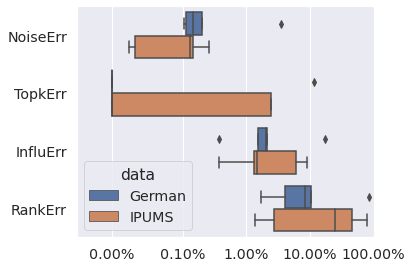

In [248]:
fig, ax = plt.subplots()
df = question_df.query('metric.str.contains("Err")').copy()
df = map_column(df)
df['value'] = df['value']*100
sns.boxplot(
    data=df, 
    y='metric', 
    x='value', 
    hue='data',
    ax = ax
)
ax.set_xscale('symlog', linthreshx=0.1)
ax.set_xlim(-0.05, 100)
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
fig.tight_layout()
fig.savefig('./plots/input-error.pdf', bbox_inches='tight')

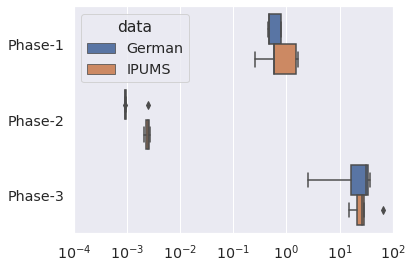

In [250]:
fig, ax = plt.subplots()
df = question_df.query('metric.str.contains("Phase")').copy()
df = map_column(df)
# df['value'] = df['value']*100
sns.boxplot(
    data=df, 
    y='metric', 
    x='value', 
    hue='data',
    ax = ax
)
ax.set_xscale('log')
ax.set_xlim(0.0001, 100)
ax.set_ylabel('')
ax.set_xlabel('')
# ax.xaxis.set_major_formatter(mtick.PercentFormatter())
fig.tight_layout()
fig.savefig('./plots/input-time.pdf', bbox_inches='tight')

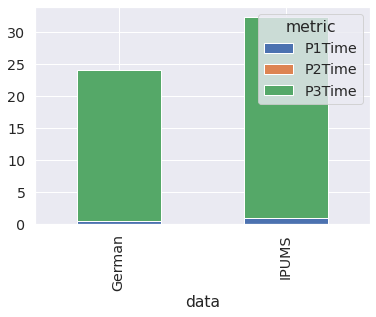

In [76]:
ax = pd.pivot_table(
    df,
    columns='metric',
    index='data',
    values='value'
).plot(kind='bar', stacked=True)
# ax.set_yscale('symlog')
# ax.set_ylim(-1, 100)

# Parameters

In [210]:
parameters = [
    'agg',
    'rho_query',
    'rho_topk',
    'rho_influ',
    'rho_rank',
    'gamma',
    'scale',
    'split_factor',
    'k',
    'predicate_strategy'
]
prefixes = [
    '../ipumscps/results',
    '../german/results'
]
column_mapping = {
    'error_nq': 'NoiseErr',
    'error_topk': 'TopkErr',
    'error_infci': 'InfluErr',
    'error_rnkci': 'RankErr',
    't_phase_1': 'P1Time',
    't_phase_2': 'P2Time',
    't_phase_3': 'P3Time',
    'runtime': 'Runtime (s)',
    'agg': 'Aggregation Type',
    'rho_query': 'Privacy Budget of Query',
    'rho_topk': 'Privacy Budget of Topk',
    'rho_influ': 'Privacy Budget of Influence CI',
    'rho_rank': 'Privacy Budget of Rank CI',
    'gamma': 'Confidence Level',
    'scale': 'Data Scale',
    'split_factor': 'Split Factor',
    'k': 'Size of Explanations',
    'predicate_strategy': 'Predicate Size'
}
value_range = {
    'NoiseErr': (0, 0.4),
    'InfluErr': (0, 1.0),
    'RankErr': (0, 4.0),
    'Runtime (s)': (0, 100),
}
value_scale = {
    'NoiseErr': 'linear',
    'InfluErr': 'linear',
    'RankErr': 'linear',
    'Runtime (s)': 'linear',
}
value_percent = {
    'NoiseErr': 1,
    'InfluErr': 1,
    'RankErr': 1,
}
special_value_range = {
    ('NoiseErr', 'Aggregation Type'): (0.01, 20),
    ('RankErr', 'Size of Explanations'): (0, 50),
    ('RankErr', 'Predicate Size'): (0.001, 10),
    ('Runtime (s)', 'Predicate Size'): (0.001, 1000000),
}
special_value_scale = {
    ('NoiseErr', 'Aggregation Type'): 'log',
    ('RankErr', 'Predicate Size'): 'log',
    ('Runtime (s)', 'Predicate Size'): 'log',
}
special_value_percent = {
    ('NoiseErr', 'Aggregation Type'): 2,
    ('RankErr', 'Predicate Size'): 3
}
def map_column(df):
    df = df.rename(columns=column_mapping)
    return df

def map_row(df):
    df['predicate_strategy'] = df['predicate_strategy'].apply(lambda row: {
        '1-way marginal': '1-attr',
        '2-way marginal': '2-attr',
        '3-way marginal': '3-attr'
    }[row])

/home/yuchao/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


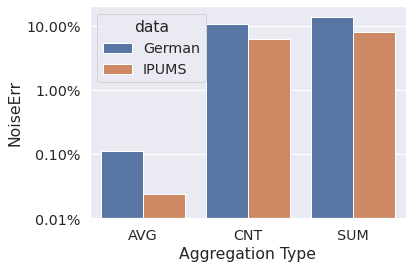

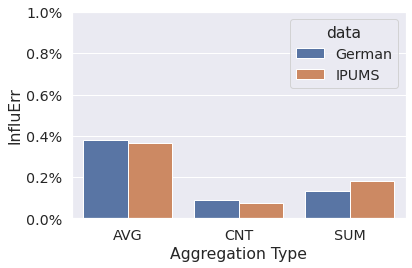

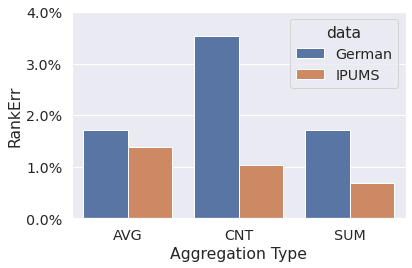

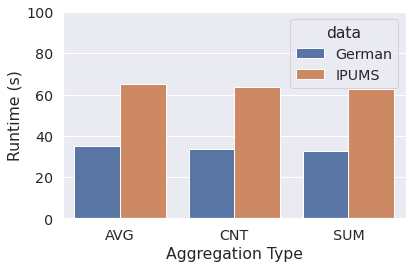

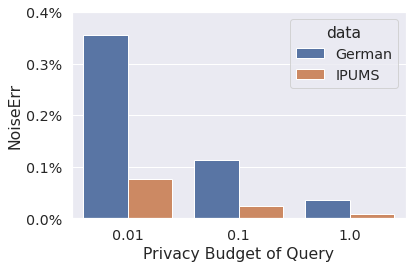

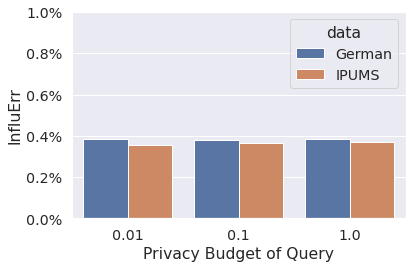

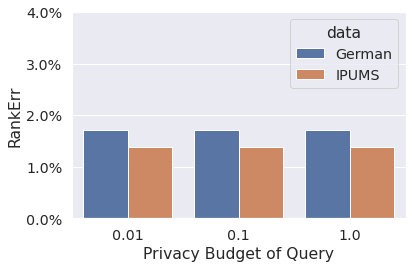

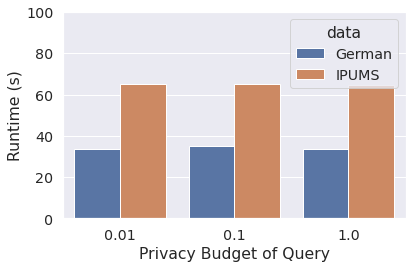

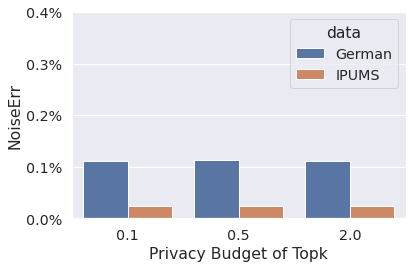

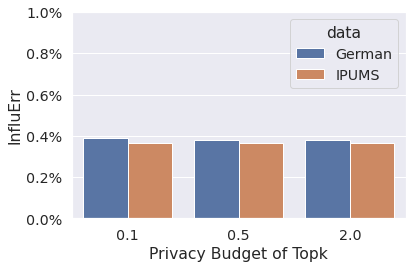

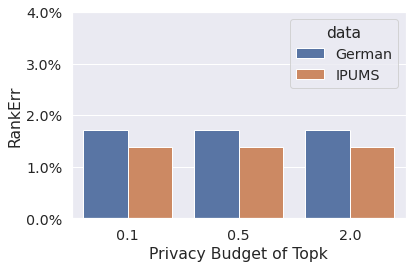

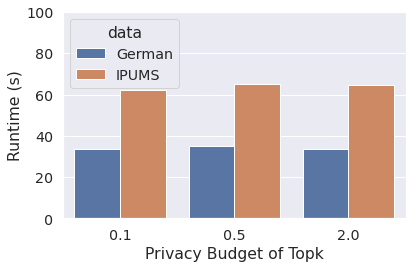

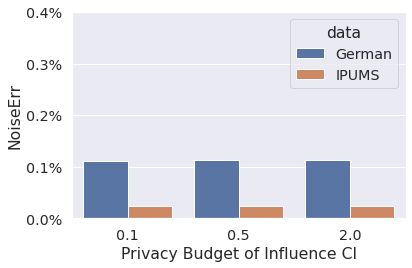

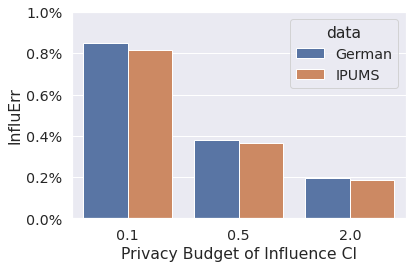

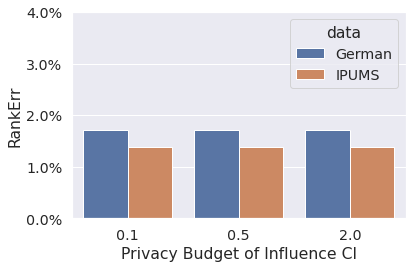

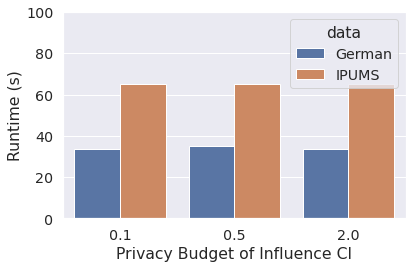

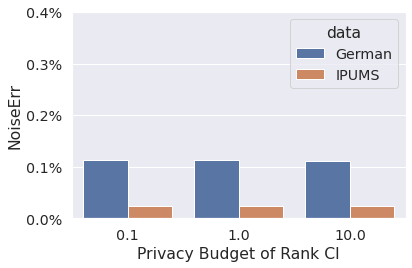

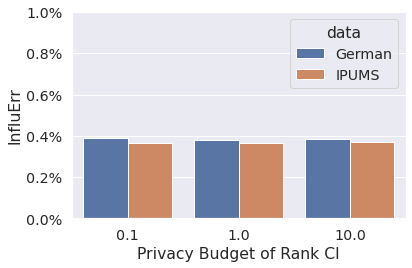

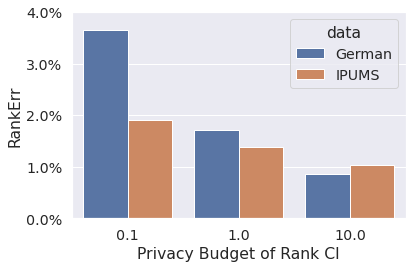

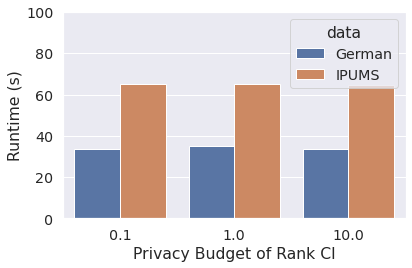

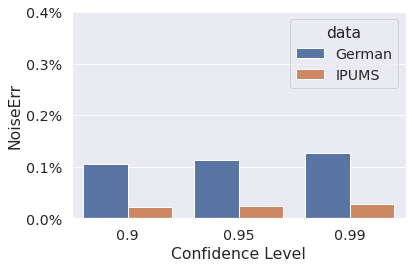

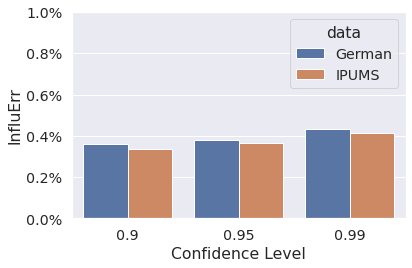

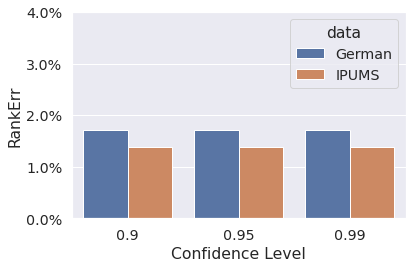

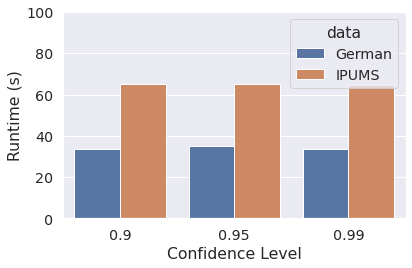

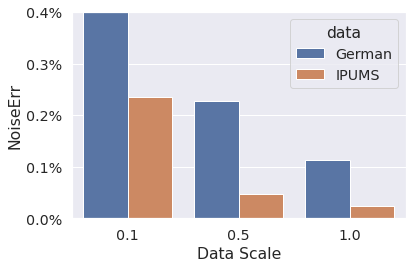

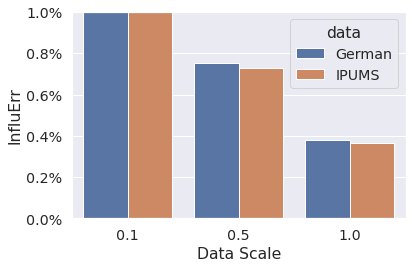

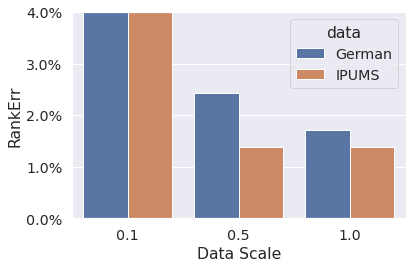

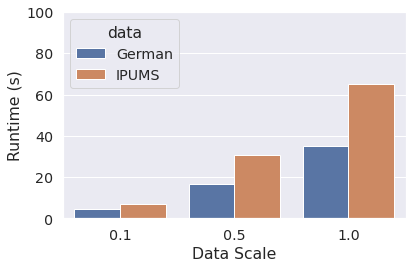

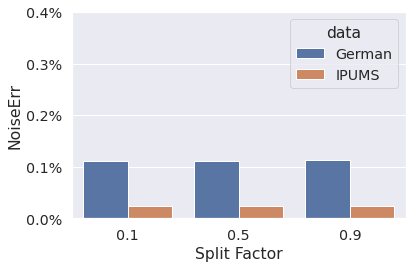

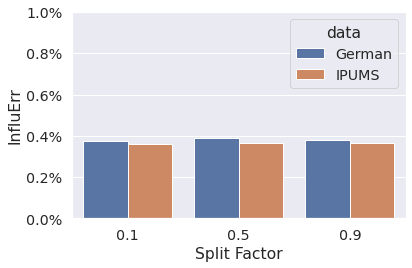

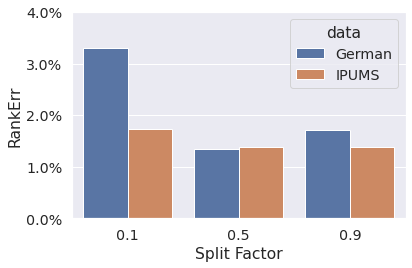

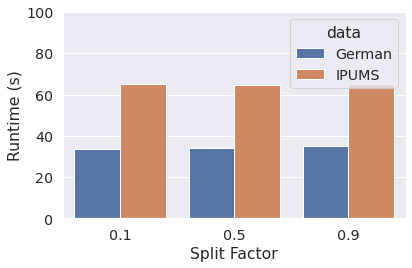

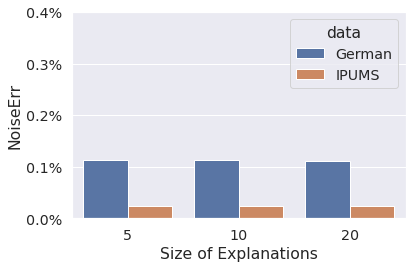

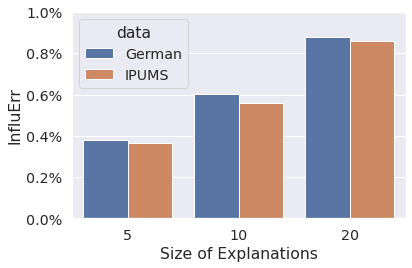

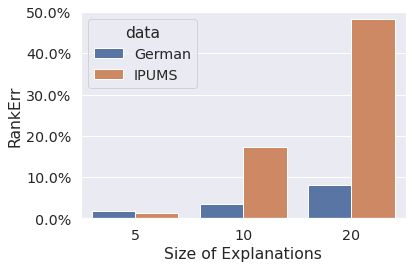

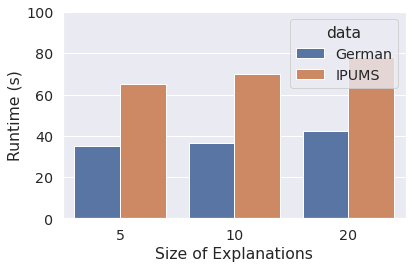

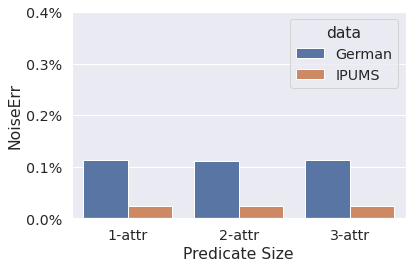

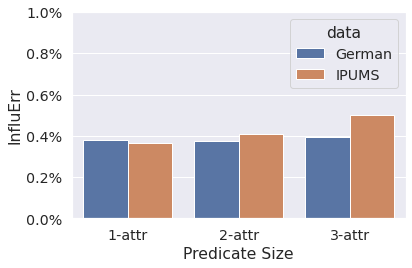

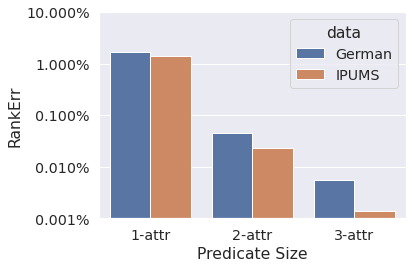

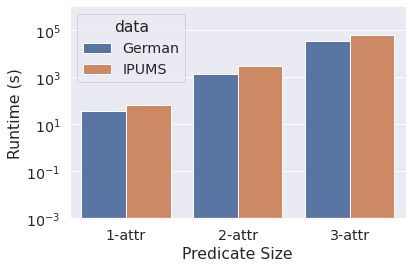

In [214]:
for param in parameters:
    df = []
    for prefix in prefixes:
        tdf = pd.read_csv(f'{prefix}/{param}.csv')
        df.append(tdf)
    df = pd.concat(df)
    map_row(df)
    df = df.groupby(['data', param]).median().reset_index()
    df = map_column(df)
    for metric in ['NoiseErr', 'TopkErr', 'InfluErr', 'RankErr']:
        df[metric] = df[metric] * 100
    for metric in ['NoiseErr', 'InfluErr', 'RankErr', 'Runtime (s)']:
#         if metric != 'NoiseErr':
#             continue
        fig, ax = plt.subplots()
        sns.barplot(data=df, x=column_mapping[param], y=metric, hue='data')
        ax.set_ylim(*value_range[metric])
        ax.set_yscale(value_scale[metric])
        special = (metric, column_mapping[param])
        if special in special_value_range:
            ax.set_ylim(*special_value_range[special])
        if special in special_value_scale:
            ax.set_yscale(special_value_scale[special])
        if 'Err' in metric:
            decimals = value_percent[metric]
            if special in special_value_percent:
                decimals = special_value_percent[special]
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=decimals))
        fig.tight_layout()
        fig.savefig(f'./plots/param-{param}-{metric.replace(" ","")}.pdf', bbox_inches='tight')
#     break

In [202]:
param_ipums = pd.read_csv('../ipumscps/results/questions.csv')
question_german = pd.read_csv('../german/results/questions.csv')
question_df = pd.concat([question_ipums, question_german])
question_df = map_column(question_df)
question_df = question_df.groupby(['data', 'Agb', 'g1', 'g2']).median().reset_index()
question_df = pd.melt(
    question_df,
    id_vars = ['data', 'Agb', 'g1', 'g2'],
    value_vars = ['NoiseErr', 'TopkErr', 'InfluErr', 'RankErr', 
                  'P1Time', 'P2Time', 'P3Time'],
    var_name='metric', 
    value_name='value'
)